In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

I0: 0.130373418373
I1: 0.411808809182
I2: 2.42667492769
Actual betas: 9.585574746397496
Estimated betas: 9.62445704349


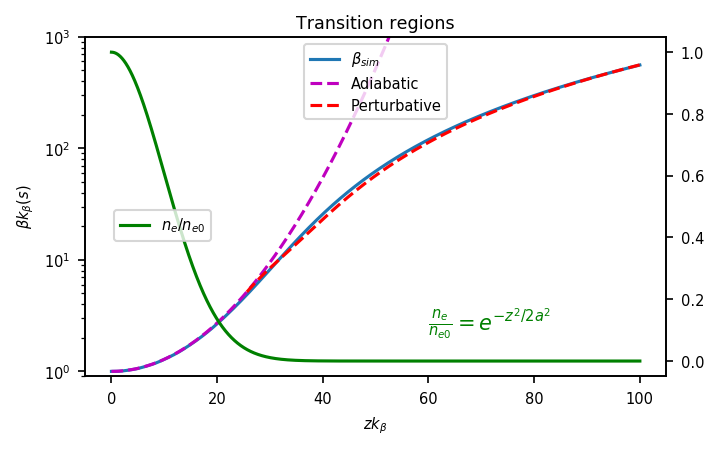

In [2]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 10
z = np.linspace(0, 100, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .28

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-np.array(alpha)<=cutoff][-1]
betaTran = np.array(1/np.sqrt(frac))[-np.array(alpha)<=cutoff][-1]
alphaTran = np.array(-z/(4*a**2*np.sqrt(frac)))[-np.array(alpha)<=cutoff][-1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
print("I0:", I0[-1])
print("I1:", I1[-1])
print("I2:", I2[-1])
gammaTran = (1+alphaTran**2)/betaTran
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran
alphaPer = -2*np.gradient(betaPer, dz)
print("Actual betas:", beta[-1]/(alpha[-1]**2+1))
print("Estimated betas:", betaPer[-1]/(alpha[-1]**2+1))

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(z, 1/np.sqrt(frac), 'm--')
plt.plot(zTran, betaPer, 'r--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Adiabatic', 'Perturbative'], loc=9)
plt.ylim(.9, 1e3)
plt.yscale('log')
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(60, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()

I0: 0.864973850268
I1: 3.39251083603
I2: 23.8700303055
Actual betas: 9.363823924393524
Estimated betas: 333.955932658


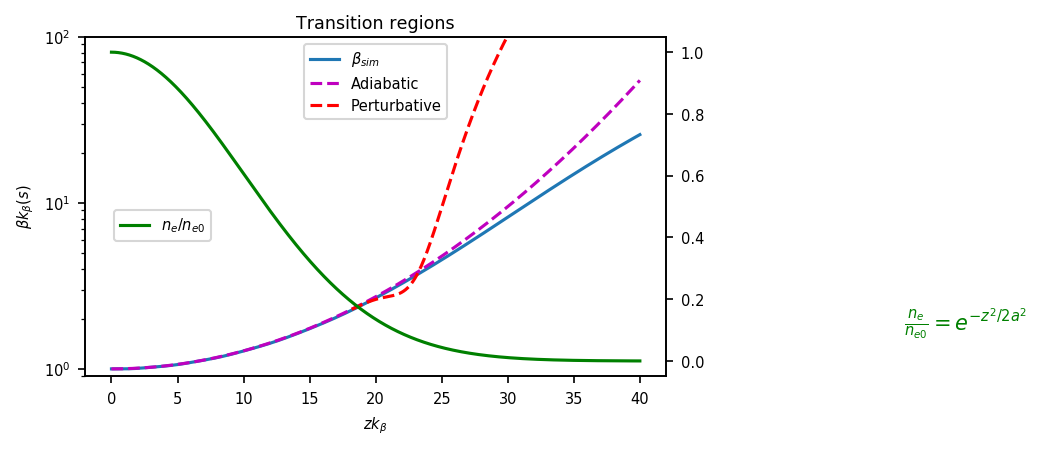

In [3]:
N = 2000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 10
z = np.linspace(0, 40, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .1

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-np.array(alpha)<=cutoff][-1]
betaTran = np.array(1/np.sqrt(frac))[-np.array(alpha)<=cutoff][-1]
alphaTran = np.array(-z/(4*a**2*np.sqrt(frac)))[-np.array(alpha)<=cutoff][-1]
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
print("I0:", I0[-1])
print("I1:", I1[-1])
print("I2:", I2[-1])
gammaTran = (1+alphaTran**2)/betaTran
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran
alphaPer = -2*np.gradient(betaPer, dz)
print("Actual betas:", beta[-1]/(alpha[-1]**2+1))
print("Estimated betas:", betaPer[-1]/(alpha[-1]**2+1))

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(z, 1/np.sqrt(frac), 'm--')
plt.plot(zTran, betaPer, 'r--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Adiabatic', 'Perturbative'], loc=9)
plt.ylim(.9, 1e2)
plt.yscale('log')
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(60, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()

I0: 0.503826905552
I1: 0.159997914565
I2: 0.0802121047882
Actual betas: 1.0700822963422763
Estimated betas: 1.09067343229
Estimated betas: 1.4705792153
Estimated betas: 1.04226916959


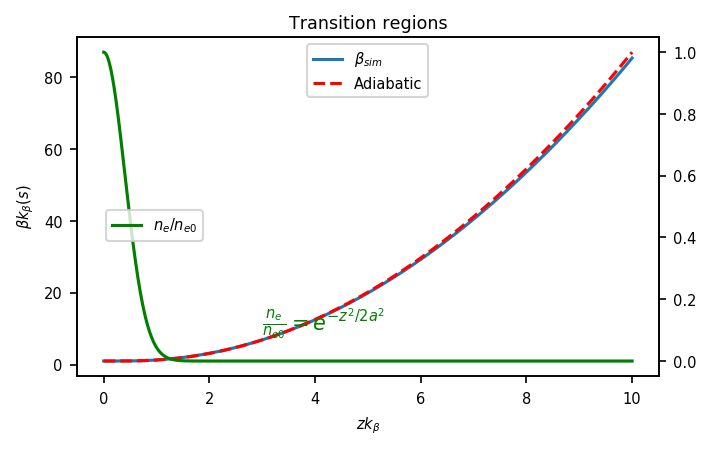

In [25]:
# Perturbative solution, short ramp
N = 2000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = .4
z = np.linspace(0, 10, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

dz = z[1]-z[0]
I0 = np.cumsum(frac)*dz
I1 = np.cumsum(z*frac)*dz
I2 = np.cumsum(z*z*frac)*dz
print("I0:", I0[-1])
print("I1:", I1[-1])
print("I2:", I2[-1])
gamma0 = (1+alpha0**2)/beta0
M11 = 1-I0*z+I1
M12 = z-I1*z+I2
betaPer = M11**2*beta0 - 2*M11*M12*alpha0 + M12**2*gamma0
alphaPer = -2*np.gradient(betaPer, dz)
print("Actual betas:", beta[-1]/(alpha[-1]**2+1))
print("Estimated betas:", betaPer[-1]/(alpha[-1]**2+1))
print("Estimated betas:", 1/(gamma0+2*(alpha0*I0[-1]-gamma0*I1[-1])))
print("Estimated betas:", 1/(gamma0+2*(alpha0*I0[-1]-gamma0*I1[-1]-alpha0*I0[-1]*I1[-1])+beta0*I0[-1]**2+gamma0*I1[-1]**2))

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(z, betaPer, 'r--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Adiabatic', 'Perturbative'], loc=9)
#plt.ylim(.9, 1e3)
#plt.yscale('log')
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(3, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()